# Flight Delays in US in 2008
## by Donia Sharafeldin


## Investigation Overview

> Relationship between delays 
> best and worst carriers in time
> Causes of delays and cancellations

## Dataset Overview

> flight data tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in this data.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("2008.csv")


# Visualization 1
## Investigating cases of delays

### Conclusions:

    1. 76% of flights arrived on time
    2. 15.2% arrived with delay of more than 15 min
    3. 6.6% arrived with delay more than one hour

In [4]:
for _ in df:
    df.loc[df['ArrDelay'] <= 15, 'case'] = 0
    df.loc[df['ArrDelay'] >= 15, 'case'] = 1
    df.loc[df['ArrDelay'] >= 60, 'case'] = 2
    df.loc[df['Diverted'] == 1, 'case'] = 3
    df.loc[df['Cancelled'] == 1, 'case'] = 4

CancelledFlights = df[(df.case == 4)]

cancelled = df.case.value_counts()




Text(0.5, 1.0, 'Cases of delay or cancellation')

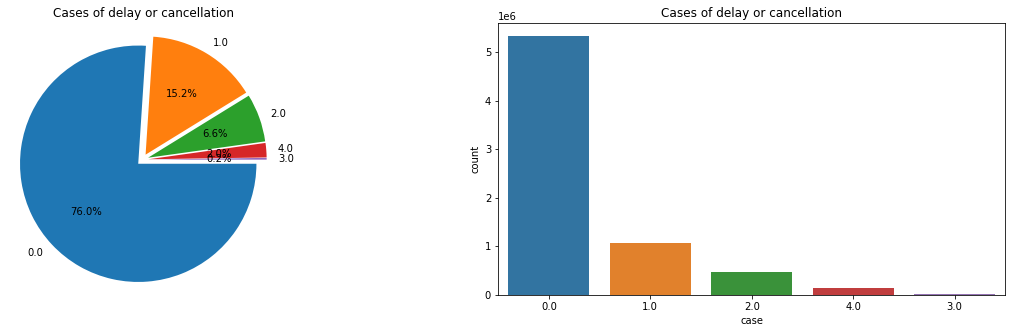

In [5]:
plt.figure(figsize = [20, 5]) 
plt.subplot(1, 2, 1) 
plt.pie(cancelled, labels = cancelled.index,startangle =0,
        counterclock = False,autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05])
plt.title('Cases of delay or cancellation')
plt.axis('square')
plt.subplot(1, 2, 2)
sb.countplot('case',order =cancelled.index, data=df)
plt.title('Cases of delay or cancellation')

# visualization 2
## Causes of cancellations:
### Conclusions

>  1. 39.9% of cancellation due to weather
>  2. National Airspace System (NAS) cancelation
>  3. Security cancellations are alomost 0%
  

In [6]:
code = df.CancellationCode.value_counts()

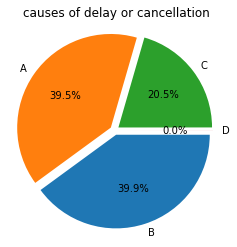

In [19]:
plt.pie(code, labels = code.index,startangle =0,
        counterclock = False,autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05])
plt.axis('square')
plt.title('causes of delay or cancellation');


# Visualization 3
## Best and worst Carrier 
### Conclusions:
> If you are in US and you decided to travel, Avoide Hawaiian Airlines(HA) and Mesa Airlines (YV), but i recommend AirTran Airways(FL) and Southwest Airlines(WN)



In [8]:
Delayedflights = df[(df.case >= 1) &(df.case < 3)]
order =['WN','AA','OO','MQ','US','DL','UA','XE','NW','CO','EV','9E','FL','YV','OH','B6','AS','F9',
  'HA','AQ']



Text(0.5, 1.0, 'Carrier Vs. Delay')

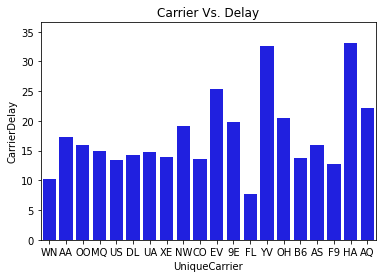

In [18]:
sb.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,order =['WN','AA','OO','MQ','US','DL','UA','XE','NW','CO','EV','9E','FL','YV','OH','B6','AS','F9',
  'HA','AQ'], errwidth=0,color ="blue");
plt.title('Carrier Vs. Delay')

# Visualization 4
## Delay relations:
### Conclusions:
> 1. All delays variables show correlation with Arrival delay which make sense
> 2. Departure Delay and Arrival Delay show correlation with CarrierDelay

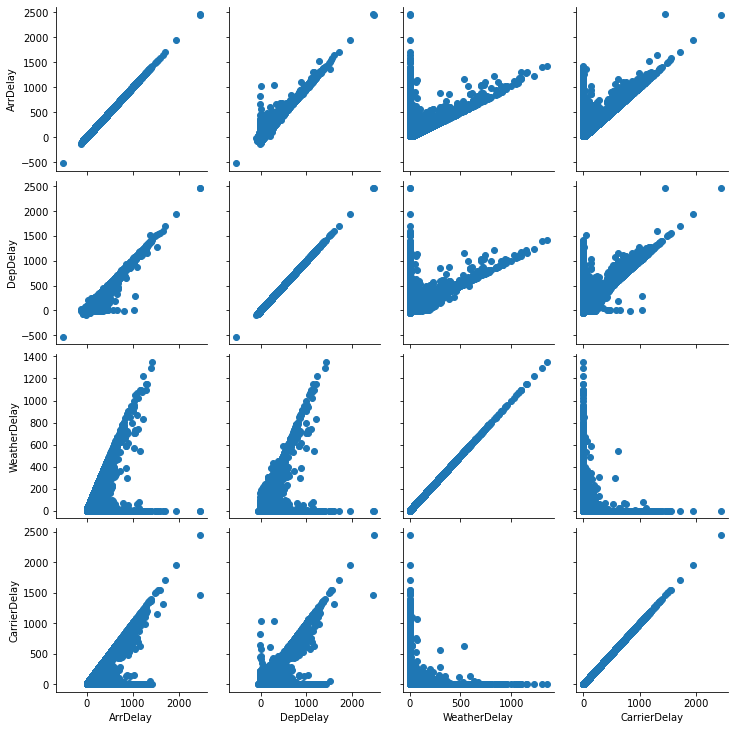

In [20]:
g = sb.PairGrid(data = df, vars = ['ArrDelay', 'DepDelay', 'WeatherDelay','CarrierDelay']);
g.map(plt.scatter);